In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [2]:
feature_data = pd.read_csv("pca_80.csv")
feature_data = feature_data.drop("Unnamed: 0", axis=1)


print(feature_data)

scaler = StandardScaler()
scaler.fit(feature_data.to_numpy())
scaled_data = scaler.transform(feature_data.to_numpy())

              0         1         2         3         4         5         6
0     -1.607089  0.977637 -1.438565  0.337278  0.355466 -0.987907  0.095951
1     -1.927880  1.913510 -0.355332 -0.870293  0.790256 -0.823986  0.361883
2     -1.535186 -0.575798 -1.292271  0.089676 -0.606063  0.937314  0.507589
3     -2.295617 -0.109649  0.701057 -0.826316  0.173927  0.304218  0.801937
4     -2.332972  1.013812 -0.639852  0.292193  0.397987 -0.156771 -0.885593
...         ...       ...       ...       ...       ...       ...       ...
48385 -1.298817  1.778724 -0.262809  0.106797  0.174744 -0.772963  0.911052
48386 -0.645885  1.918875 -0.211133 -0.287382  1.781263  0.573107  1.563539
48387  3.945842  0.205881  2.035792 -0.618599 -0.769166  0.273729 -0.334781
48388 -0.463106  1.825685  0.406020 -0.693966 -0.541033 -1.565569  1.598902
48389  2.194011 -0.141042 -1.265682 -0.434328 -1.331073 -0.283625  0.938495

[48390 rows x 7 columns]


In [3]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 7,
}

In [4]:
inertia = []
silhouette_coef = []
db_index = []

for k in range(1, 11):
    print(k)
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

    if (k != 1):
        db_index.append(davies_bouldin_score(scaled_data, kmeans.labels_))
        silhouette_coef.append(silhouette_score(scaled_data, kmeans.labels_))

1
2
3
4
5
6
7
8
9
10


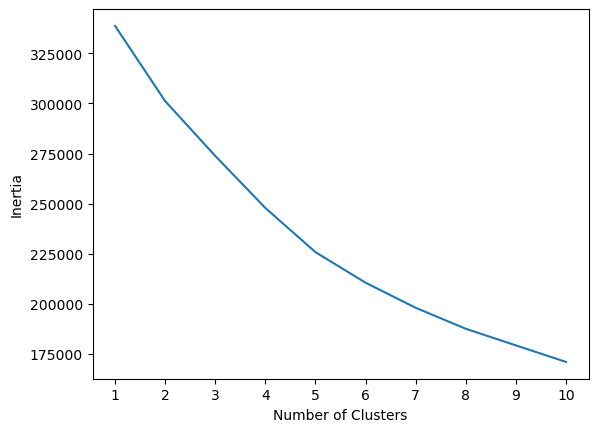

In [5]:
plt.plot(range(1, 11), inertia)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [6]:
kl = KneeLocator(
    range(1, 11), inertia, curve="convex", direction="decreasing"
)

print(kl.elbow)

5


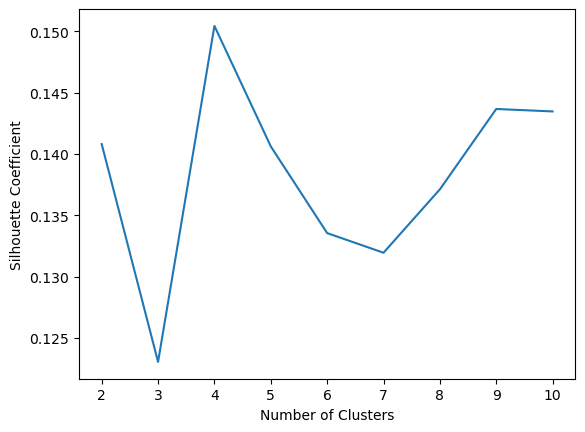

In [7]:
plt.plot(range(2, 11), silhouette_coef)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

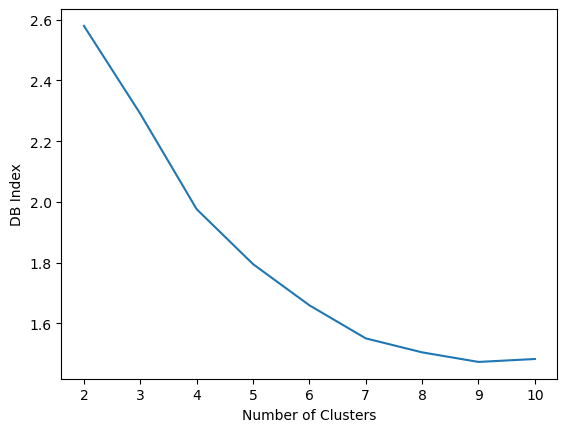

In [8]:
plt.plot(range(2, 11), db_index)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("DB Index")
plt.show()

In [9]:
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(scaled_data)

kmeans_4_centers = {
    "centers": kmeans.cluster_centers_,
    "labels": kmeans.labels_,
    "inertia": kmeans.inertia_,
    "iterations": kmeans.n_iter_,
    "features": kmeans.n_features_in_,
}

In [10]:
# Clustering Evaluation

db_index = davies_bouldin_score(scaled_data, kmeans.labels_)
print("DB Index: " + str(db_index))

silhouette_coefficient = silhouette_score(scaled_data, kmeans.labels_)
print("Silhouette Coefficient: " + str(silhouette_coefficient))




DB Index: 1.9759364545466456
Silhouette Coefficient: 0.1504528601378462


In [11]:
def parse_tags(tag):
    tag = tag.strip("[")
    tag = tag.strip("]")
    labels = []
    if ", " in tag: 
        for label in tag.split(", "):
            labels.append(label.strip("'"))
    else:
        labels = [tag.strip("'")]
    return labels

In [12]:
labeled_data = pd.read_csv("single_tags.csv")

In [13]:
tags_represented = {
    0: {},
    1: {},
    2: {},
    3: {},
}

for i in np.unique(kmeans_4_centers["labels"]):
    indices = np.where(kmeans_4_centers["labels"] == i)[0]
    for index in indices:
        for label in parse_tags(labeled_data._get_value(index, "seeds")):
            if  label not in tags_represented[i].keys():
                tags_represented[i].update({label: 1})
            else:
                tags_represented[i][label] += 1

print(tags_represented)

{0: {'aggressive': 123, 'angry': 124, 'angst-ridden': 1, 'confrontational': 5, 'defiant': 5, 'demonic': 5, 'explosive': 15, 'fierce': 64, 'harsh': 44, 'hostile': 2, 'hyper': 35, 'intense': 81, 'malevolent': 1, 'manic': 18, 'menacing': 23, 'nihilistic': 2, 'ominous': 25, 'outraged': 1, 'outrageous': 4, 'provocative': 12, 'rebellious': 13, 'reckless': 3, 'savage': 20, 'uncompromising': 1, 'unsettling': 3, 'visceral': 1, 'volatile': 1, 'apocalyptic': 21, 'dark': 45, 'eerie': 49, 'fractured': 4, 'gloomy': 75, 'halloween': 43, 'macabre': 3, 'paranoid': 50, 'scary': 40, 'spooky': 28, 'urgent': 10, 'bitter': 29, 'bleak': 13, 'cold': 32, 'grim': 10, 'lonely': 38, 'nocturnal': 12, 'delicate': 11, 'dreamy': 16, 'ethereal': 15, 'gentle': 21, 'intimate': 13, 'introspective': 22, 'lazy': 58, 'meditative': 11, 'pastoral': 1, 'relaxed': 35, 'soothing': 24, 'sparse': 7, 'brash': 11, 'ironic': 47, 'sarcastic': 17, 'sardonic': 2, 'satirical': 4, 'wry': 5, 'ambitious': 3, 'brassy': 3, 'cathartic': 12, 'd

In [14]:
cluster_zero = tags_represented[0]

cluster_zero = dict(sorted(cluster_zero.items(), key=lambda item: item[1]))

tags_0= np.array(list(cluster_zero.keys())).reshape(-1, 1)
occurrences_0 = np.array(list(cluster_zero.values())).reshape(-1, 1)

cluster_zero_occurrences = np.flip(np.hstack((tags_0, occurrences_0)), axis=0)

print(cluster_zero_occurrences)
print(cluster_zero)

[['lyrical' '148']
 ['angry' '124']
 ['aggressive' '123']
 ['gritty' '112']
 ['silly' '112']
 ['smooth' '100']
 ['humorous' '94']
 ['sleazy' '81']
 ['witty' '81']
 ['intense' '81']
 ['technical' '77']
 ['sexy' '76']
 ['gloomy' '75']
 ['energetic' '73']
 ['cheerful' '70']
 ['fun' '65']
 ['epic' '64']
 ['fierce' '64']
 ['positive' '60']
 ['erotic' '58']
 ['spiritual' '58']
 ['lazy' '58']
 ['powerful' '54']
 ['serious' '53']
 ['light' '51']
 ['nostalgic' '51']
 ['eccentric' '50']
 ['paranoid' '50']
 ['eerie' '49']
 ['whimsical' '47']
 ['playful' '47']
 ['ironic' '47']
 ['quirky' '46']
 ['trippy' '46']
 ['dark' '45']
 ['optimistic' '44']
 ['harsh' '44']
 ['narrative' '43']
 ['halloween' '43']
 ['scary' '40']
 ['hypnotic' '39']
 ['uplifting' '39']
 ['lonely' '38']
 ['exciting' '37']
 ['thoughtful' '36']
 ['poignant' '35']
 ['passionate' '35']
 ['warm' '35']
 ['relaxed' '35']
 ['hyper' '35']
 ['sexual' '34']
 ['lively' '33']
 ['cerebral' '33']
 ['flashy' '32']
 ['dramatic' '32']
 ['cold' '32

In [15]:
cluster_one = tags_represented[1]

cluster_one = dict(sorted(cluster_one.items(), key=lambda item: item[1]))

tags_1= np.array(list(cluster_one.keys())).reshape(-1, 1)
occurrences_1 = np.array(list(cluster_one.values())).reshape(-1, 1)


cluster_one_occurrences = np.flip(np.hstack((tags_1, occurrences_1)), axis=0)

print(cluster_one_occurrences)


[['sleazy' '542']
 ['sexy' '475']
 ['happy' '428']
 ['smooth' '415']
 ['fun' '409']
 ['romantic' '396']
 ['energetic' '389']
 ['positive' '386']
 ['cheerful' '359']
 ['uplifting' '345']
 ['light' '334']
 ['angry' '331']
 ['sweet' '330']
 ['bittersweet' '325']
 ['erotic' '323']
 ['mellow' '321']
 ['lazy' '316']
 ['lush' '311']
 ['fierce' '309']
 ['sentimental' '308']
 ['optimistic' '306']
 ['lyrical' '298']
 ['epic' '297']
 ['powerful' '295']
 ['nostalgic' '285']
 ['sensual' '285']
 ['quirky' '283']
 ['aggressive' '280']
 ['lonely' '272']
 ['witty' '268']
 ['silly' '267']
 ['sad' '264']
 ['relaxed' '264']
 ['thoughtful' '259']
 ['soft' '253']
 ['driving' '248']
 ['bright' '244']
 ['tender' '239']
 ['spiritual' '236']
 ['bitter' '230']
 ['wistful' '229']
 ['calm' '228']
 ['warm' '225']
 ['playful' '218']
 ['reflective' '211']
 ['dark' '209']
 ['whimsical' '208']
 ['quiet' '206']
 ['strong' '206']
 ['soothing' '195']
 ['gloomy' '194']
 ['gentle' '191']
 ['intense' '191']
 ['passionate' '1

In [16]:
cluster_two = tags_represented[2]

cluster_two = dict(sorted(cluster_two.items(), key=lambda item: item[1]))

tags_2= np.array(list(cluster_two.keys())).reshape(-1, 1)
occurrences_2 = np.array(list(cluster_two.values())).reshape(-1, 1)


cluster_two_occurrences = np.flip(np.hstack((tags_2, occurrences_2)), axis=0)

print(cluster_two_occurrences)

[['exotic' '284']
 ['organic' '242']
 ['meditative' '223']
 ['hypnotic' '221']
 ['atmospheric' '221']
 ['mysterious' '216']
 ['gloomy' '203']
 ['technical' '200']
 ['eerie' '199']
 ['martial' '195']
 ['peaceful' '193']
 ['spooky' '191']
 ['warm' '186']
 ['spacey' '183']
 ['cold' '182']
 ['euphoric' '177']
 ['erotic' '176']
 ['gritty' '164']
 ['serious' '160']
 ['aggressive' '159']
 ['epic' '158']
 ['dark' '156']
 ['mystical' '155']
 ['lush' '155']
 ['dramatic' '152']
 ['soothing' '145']
 ['trippy' '144']
 ['ethereal' '144']
 ['quiet' '140']
 ['sacred' '139']
 ['scary' '137']
 ['spiritual' '132']
 ['gentle' '130']
 ['relaxed' '123']
 ['dreamy' '123']
 ['intense' '122']
 ['nocturnal' '114']
 ['light' '113']
 ['playful' '111']
 ['lively' '110']
 ['harsh' '105']
 ['sensual' '103']
 ['monumental' '102']
 ['poignant' '101']
 ['brooding' '101']
 ['ominous' '101']
 ['calm' '100']
 ['angry' '99']
 ['nostalgic' '95']
 ['complex' '95']
 ['uplifting' '95']
 ['delicate' '93']
 ['powerful' '91']
 ['

In [17]:
cluster_three = tags_represented[3]

cluster_three = dict(sorted(cluster_three.items(), key=lambda item: item[1]))

tags_3= np.array(list(cluster_three.keys())).reshape(-1, 1)
occurrences_3 = np.array(list(cluster_three.values())).reshape(-1, 1)


cluster_three_occurrences = np.flip(np.hstack((tags_3, occurrences_3)), axis=0)

print(cluster_three_occurrences)

[['peaceful' '106']
 ['sacred' '106']
 ['romantic' '106']
 ['gentle' '105']
 ['quiet' '102']
 ['eerie' '97']
 ['meditative' '96']
 ['sentimental' '93']
 ['spiritual' '92']
 ['mysterious' '89']
 ['dramatic' '79']
 ['soothing' '79']
 ['calm' '77']
 ['lazy' '77']
 ['soft' '72']
 ['technical' '68']
 ['ethereal' '68']
 ['epic' '65']
 ['scary' '65']
 ['spooky' '64']
 ['atmospheric' '62']
 ['intimate' '62']
 ['mystical' '61']
 ['lonely' '60']
 ['cold' '60']
 ['hypnotic' '59']
 ['nostalgic' '58']
 ['organic' '58']
 ['lush' '58']
 ['poignant' '57']
 ['tender' '56']
 ['light' '54']
 ['lyrical' '54']
 ['dark' '53']
 ['melancholy' '52']
 ['sensual' '52']
 ['martial' '51']
 ['reflective' '50']
 ['warm' '50']
 ['relaxed' '50']
 ['nocturnal' '49']
 ['intense' '49']
 ['mellow' '48']
 ['delicate' '47']
 ['aggressive' '47']
 ['sweet' '46']
 ['bitter' '45']
 ['thoughtful' '44']
 ['powerful' '44']
 ['elegant' '44']
 ['introspective' '44']
 ['sad' '43']
 ['earthy' '43']
 ['bittersweet' '42']
 ['exotic' '42

In [20]:
kmeans_3_labeled = pd.read_csv("single_tags.csv")
kmeans_3_labeled = kmeans_3_labeled.drop("Unnamed: 0", axis=1)

print(kmeans_3_labeled.shape)
kmeans_3_labeled.insert(len(kmeans_3_labeled.columns), "Labels", kmeans_4_centers["labels"], True)

print(kmeans_3_labeled.shape)

kmeans_3_labeled.to_csv("kmeans_pca_80.csv")

(48390, 22)
(48390, 23)


In [34]:
#Song Sampling

c1_idx = np.where(kmeans_3_centers["labels"] == 0)[0]
c2_idx = np.where(kmeans_3_centers["labels"] == 1)[0]
c3_idx = np.where(kmeans_3_centers["labels"] == 2)[0]

c1_sample = np.random.choice(c1_idx, size=10, replace=False)
c2_sample = np.random.choice(c2_idx, size=10, replace=False)
c3_sample = np.random.choice(c3_idx, size=10, replace=False)

print("Cluster 1")
print(kmeans_3_labeled.loc[c1_sample])
print("Cluster 2")
print(kmeans_3_labeled.loc[c2_sample])
print("Cluster 3")
print(kmeans_3_labeled.loc[c3_sample])

Cluster 1
       Unnamed: 0                         track                     artist  \
5757         8735      Aliveralungakidneyathumb            The pAper chAse   
40424       53222  Show Me What I'm Looking For              Carolina Liar   
38934       51644                   Los Piratas  Los Auténticos Decadentes   
28736       39624             Kryptonite (Live)               3 Doors Down   
26031       36457                      I Run It                      Ciara   
11360       16983               Satta Massagana             Ernest Ranglin   
28922       39821              Pollinating Toes                 Sean Hayes   
38602       51291        What Shall We Do Next?                     Club 8   
9595        14539                  Make or Take                       Nine   
22922       32724                   Lose Myself           Marsha Ambrosius   

                seeds              spotify_id  danceability  energy  key  \
5757        ['scary']  1jY9LcjSKmvQ6iGxchj31e         0